In [1]:
import pandas  as pd  
usaYT=pd.read_csv('USvideos.csv')
usaYT.columns



Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [2]:
usaYT[['views', 'likes', 'dislikes', 'comment_count']].corr(method='kendall')

,views,likes,dislikes,comment_count
views,1.000000,0.691329,0.680772,0.632967
likes,0.691329,1.000000,0.614065,0.715186
dislikes,0.680772,0.614065,1.000000,0.662717
comment_count,0.632967,0.715186,0.662717,1.000000


In [3]:
usaYT.groupby(by='video_error_or_removed').agg('mean')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
video_error_or_removed,,,,,,,
False,19.977814,2.361180e+06,74281.031080,3712.675927,8450.108977,0.015467,0.004129
True,10.391304,1.657090e+06,48770.434783,1442.608696,2565.391304,0.000000,0.000000


In [4]:
import matplotlib.pyplot as plt 
usaYT['publish_time']=pd.to_datetime(usaYT['publish_time'])

In [13]:
TimevViews=usaYT.groupby(by='publish_time').agg({'views':'max'})[150:]
TimevViews

,views
publish_time,
2017-11-09 11:30:00+00:00,155533
2017-11-09 13:34:58+00:00,467804
2017-11-09 14:00:01+00:00,79306
2017-11-09 14:00:04+00:00,99619
2017-11-09 14:00:08+00:00,77630
...,...
2018-06-13 15:06:08+00:00,812832
2018-06-13 16:00:01+00:00,1473589
2018-06-13 16:00:24+00:00,296615


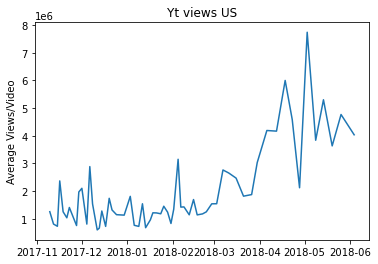

In [15]:
x=[]
y=[]
for i in range(len(TimevViews.index.values)-105):
    if i%100==0:
        x.append(TimevViews.index.values[i])
        y.append(sum(TimevViews.iloc[i:i+100]['views'])//100)

plt.plot(x,y)
plt.ylabel('Average Views/Video')
plt.title('Yt views US')
plt.show()